<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/KNN_static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix

# Download dataset

In [ ]:
!wget -O banana_dataset https://www.openml.org/data/v1/download/1586217/banana.arff

--2020-08-30 23:00:39--  https://www.openml.org/data/v1/download/1586217/banana.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75142 (73K) [text/plain]
Saving to: ‘banana_dataset’

banana_dataset      100%[===================>]  73.38K   387KB/s    in 0.2s    

2020-08-30 23:00:40 (387 KB/s) - ‘banana_dataset’ saved [75142/75142]



#Get the data and store it in numpy.array

The Scipy module arff can read .arff file and convert that to numpy array. From there we can convert it to a data frame.



In [ ]:

data = arff.loadarff('banana_dataset')
df = pd.DataFrame(data[0])

print(df.head(5))

#converting type(df['Class']) from byte to int 
print()
df['Class']=df['Class'].astype(int)
print(df.head(5))

#converting dataframe to numpy array
D=df.to_numpy()
X=df.to_numpy()[:,:2]
y=df.to_numpy()[:,-1]


#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=64)





      V1     V2 Class
0  1.140 -0.114  b'1'
1 -1.520 -1.150  b'2'
2 -1.050  0.720  b'1'
3 -0.916  0.397  b'2'
4 -1.090  0.437  b'2'

      V1     V2  Class
0  1.140 -0.114      1
1 -1.520 -1.150      2
2 -1.050  0.720      1
3 -0.916  0.397      2
4 -1.090  0.437      2


FUNCTION FOR DECISION BOUNDARY CONTOURS

In [ ]:
def knn(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,n_neighbors = 6):
    '''
    This function finds k-NN and plots the data.
    '''
    X = train_data
    y = train_label
  
    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1)
    clf.fit(X, y)


    
    x1 = np.linspace(-3,3,100)
    x2 = np.linspace(-3,3,100)
    xx,yy = np.meshgrid(x1,x2)

    # we predict the value (either 0 or 1) of each element in the grid

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # convert the output back to the xx shape (we need it to plot the decision boundry)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(14,7))
    fig=plt.gcf()
    fig.set_facecolor('white')

    plt.subplot(1,2,1)

    plt.scatter(train_data[train_label==1,0], train_data[train_label==1,1], c='b', marker=".", label='first')
    plt.scatter(train_data[train_label==2,0], train_data[train_label==2,1], c='r', marker="x", label='second')


    plt.legend(loc='upper right')
    plt.contour(xx, yy, Z,linestyles='solid',colors=['black'],levels=['0.5'])
    # set the title
    plt.title('Decision Contours with Train Data and K value = '+str(n_neighbors))
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    



    plt.subplot(1,2,2)

    
    plt.scatter(test_data[test_label==1,0], test_data[test_label==1,1], c='b', marker=".", label='first')
    plt.scatter(test_data[test_label==2,0], test_data[test_label==2,1], c='r', marker="x", label='second')

    plt.legend(loc='upper right')
    plt.contour(xx, yy, Z,linestyles='solid',colors=['black'],levels=['0.5'])
   

    #defining scale on both axises
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

   
    # set the title
    plt.title('Decision Contours with Test Data and K value = '+str(n_neighbors))

    

    

    
    

SCATTER PLOT FOR Train DATA POINTS

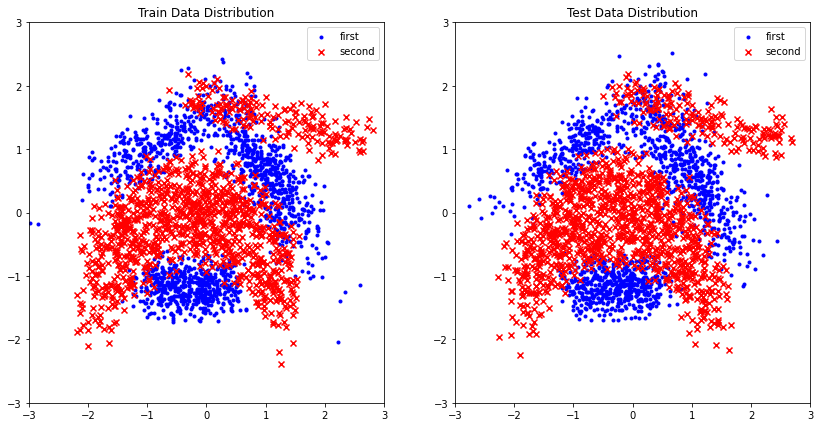

In [ ]:
# scatter plot of with given points

#Ploting the dataset without outliers
plt.figure(figsize=(14,7))
fig=plt.gcf()
  
fig.set_facecolor('white')


plt.subplot(1,2,1)
plt.title('Train Data Distribution')


plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='b', marker=".", label='first')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], c='r', marker="x", label='second')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('Test Data Distribution')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], c='b', marker=".", label='first')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], c='r', marker="x", label='second')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper right')


Interactive Plot

In [ ]:



k_widget=widgets.IntSlider(value=1,
    min=1,
    max=25,
    step=1,
    description='k',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

interact(knn,n_neighbors=k_widget,train_data=fixed(X_train),train_label=fixed(y_train),test_data=fixed(X_test),test_label=fixed(y_test),continuous_update=False)


interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=25, min=1), Output()), …

<function __main__.knn>

#STATIC PLOTS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: No contour l

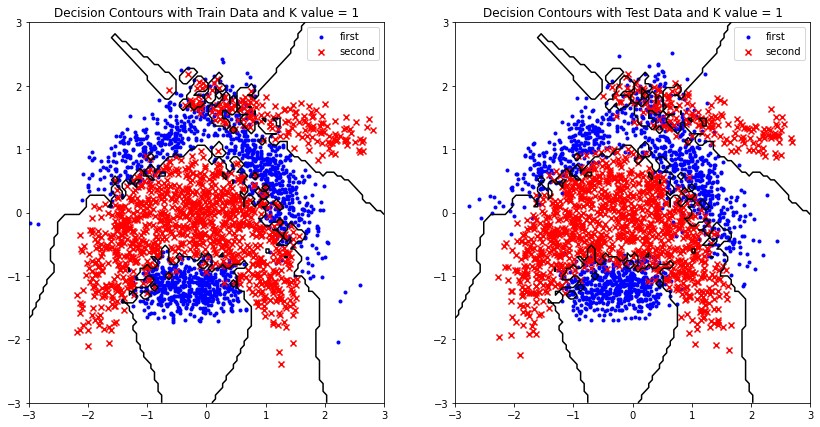

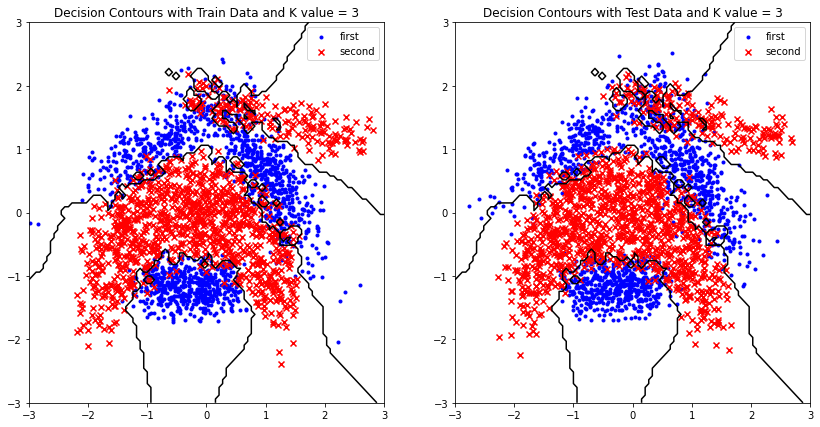

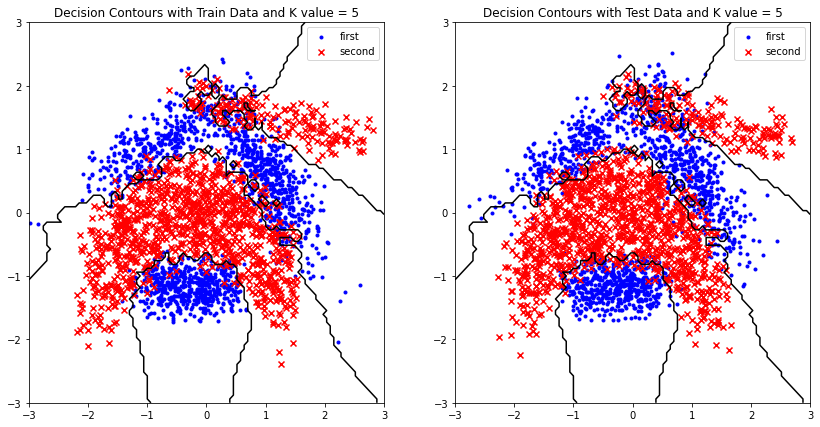

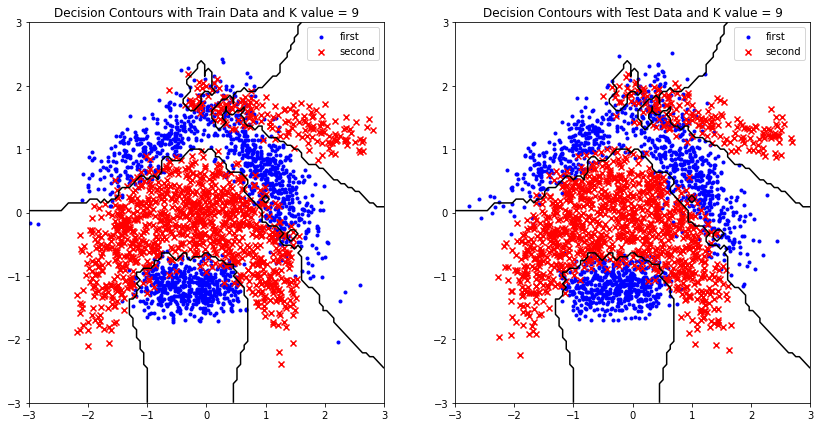

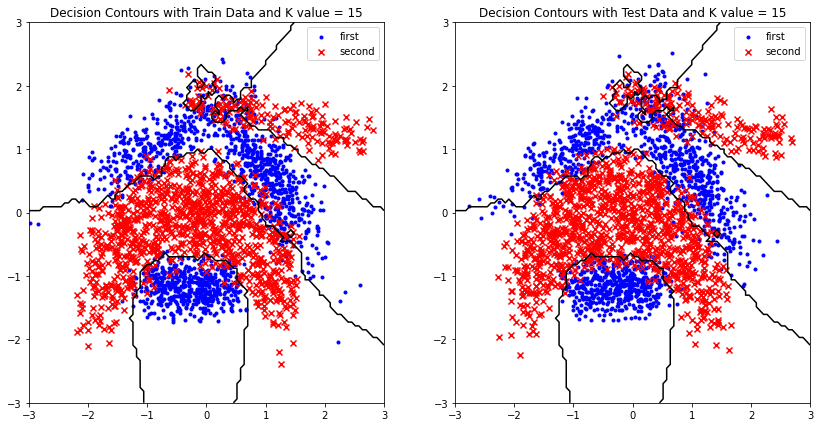

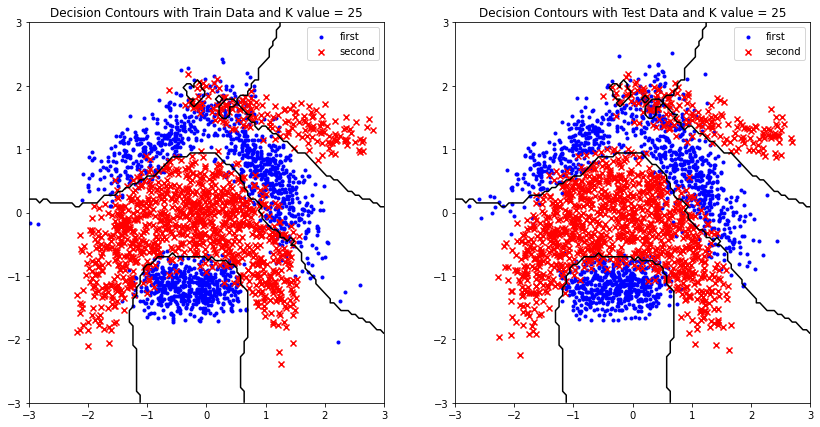

In [ ]:
for k in [1, 3, 5, 9,15, 25]:
  knn(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,n_neighbors = k)


<Figure size 504x504 with 0 Axes>

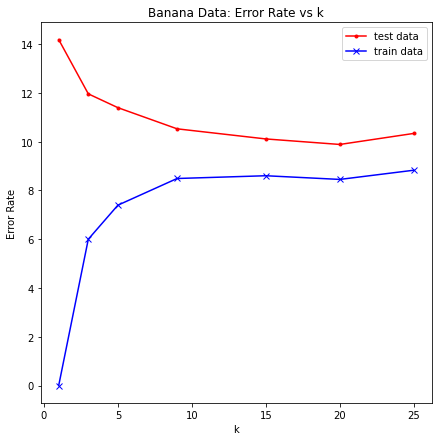

In [ ]:
#Accuracy
plt.figure(figsize=(7,7))
k=[1, 3, 5, 9, 15, 20,25]
Accuracy_test=np.zeros(len(k))
Accuracy_train=np.zeros(len(k))
for idx,k_value in enumerate(k):
  clf = neighbors.KNeighborsClassifier(k_value, n_jobs=-1)
  clf.fit(X_train, y_train)
  ypred_train=clf.predict(X_train)
  ypred_test = clf.predict(X_test)

  C_M_test=confusion_matrix(y_test, ypred_test)
  Accuracy_test[idx]=((C_M_test[0,1]+C_M_test[1,0])*100)/np.sum(C_M_test)

  C_M_train=confusion_matrix(y_train, ypred_train)
  Accuracy_train[idx]=((C_M_train[0,1]+C_M_train[1,0])*100)/np.sum(C_M_train)


plt.figure(figsize=(7,7))
fig=plt.gcf()
  
fig.set_facecolor('white')

plt.plot(k,Accuracy_test,'.r-',label="test data")
plt.plot(k,Accuracy_train,'xb-',label="train data")
plt.ylabel('Error Rate')
plt.xlabel('k')
plt.title("Banana Data: Error Rate vs k")
 
plt.legend(loc='upper right')
plt.show()
